<a href="https://colab.research.google.com/github/shpotes/TF-workshop/blob/master/MNIST/AGI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  from google.colab import files
  files.upload()
  %tensorflow_version 2.x
except:
  pass

Saving fashion_mnist.h5 to fashion_mnist.h5
TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0

# Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
   test_size=0.2)

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
model = tf.keras.models.load_model('fashion_mnist.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
loss_value, acc = model.evaluate(X_test, y_test, verbose=0)
print('test accuracy: {}%'.format(acc * 100))

test accuracy: 88.27999830245972%


In [6]:
index_mask = np.arange(28 * 28)
np.random.shuffle(index_mask)
index_mask

array([751, 563, 139, 352, 283, 709, 239, 391, 324, 442, 392, 329, 681,
       406, 597,  13, 507, 190,  88, 136,  67, 449, 229, 142, 197, 661,
        26, 370, 100, 710, 160, 174, 535, 233, 115, 195,  96, 236, 493,
       124, 432, 218, 241,  38, 613, 497,  58, 606,  21, 186, 429, 541,
       758, 687, 157, 210, 440,  68, 193, 707, 399, 592, 123, 633, 605,
       462, 328, 738, 581, 550, 719, 632, 289, 344, 612, 302, 472, 434,
        85, 353, 684, 281, 313, 634,  12, 354, 456, 772,  79, 196, 729,
       125, 743, 760,   2, 263, 122, 134, 579, 510, 678, 234, 311, 764,
       292, 458,  90,  70, 389, 753, 145, 637, 474, 603, 726, 654, 441,
       375, 331, 683, 732,  28, 336, 266, 746,  92, 477, 465, 674,  63,
       752, 586,  42, 660,  94, 228, 119, 450,  82,  71, 180, 274, 735,
       600, 259, 232,  19, 117, 403, 285, 169,  75, 163, 513, 655, 580,
       693, 420, 394, 608, 697, 298, 194, 519, 198, 118, 299, 280, 106,
       629, 530, 402, 214, 398, 635, 173, 567, 103, 300, 161, 44

In [0]:
X_test_demo = X_test.reshape(-1, 28 * 28)
X_test_demo = X_test_demo[:, index_mask]
X_test_demo = X_test_demo.reshape(-1, 28, 28)

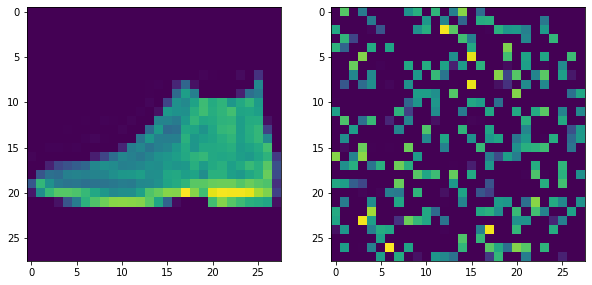

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(X_test[0])
axs[1].imshow(X_test_demo[0])
plt.show()

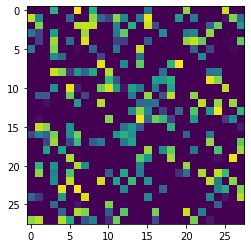

In [9]:
# que es esto?
plt.imshow(X_test_demo[3])

In [0]:
w, b = model.layers[1].get_weights()

In [11]:
w.shape, b.shape

((784, 256), (256,))

In [12]:
w_demo = w[index_mask, :]
w_demo.shape

(784, 256)

In [0]:
model.layers[1].set_weights([w_demo, b])

In [14]:
loss_value, acc = model.evaluate(X_test_demo, y_test, verbose=0)
print('test accuracy: {}%'.format(acc * 100))

test accuracy: 88.27999830245972%
